# EDA 07 Data Wrangling -II ( Handling Outliers)

### 1. Necessary Imports 

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets 
from matplotlib import pyplot as plt

### 2. Loading and undersatnding the Dataset

In [5]:
boston=datasets.load_boston()

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [16]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [17]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [20]:
X=boston.data
Y=boston.target
columns=boston.feature_names
desc=boston.DESCR

In [21]:
boston_df=pd.DataFrame(X)

In [22]:
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
target_df=pd.DataFrame(Y)

In [24]:
target_df

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [25]:
boston_df.columns=columns

In [26]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [27]:
target_df.columns=['MDEV']

In [28]:
data=pd.concat([boston_df,target_df],axis=1)

In [29]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [30]:
desc

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [31]:
desc=desc.split('\n')

In [32]:
desc

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

## 3. Outlier Detection 

### A) Univariate Analysis / Boxplots


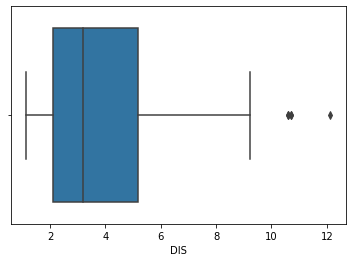

In [33]:
import seaborn as sns
sns.boxplot(x=data['DIS'])

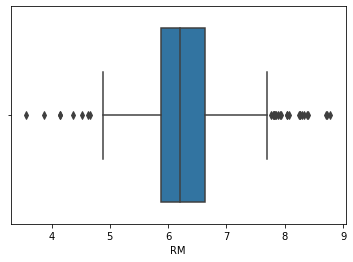

In [34]:
sns.boxplot(x=data['RM'])

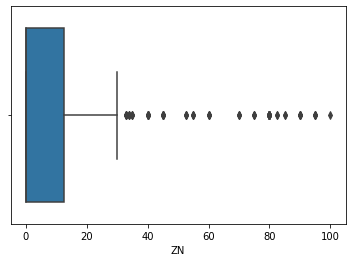

In [35]:
sns.boxplot(x=data['ZN'])

### B). Bivariate Analysis Scatterplot

Text(0, 0.5, 'full-value property-tax rate per $10,000')

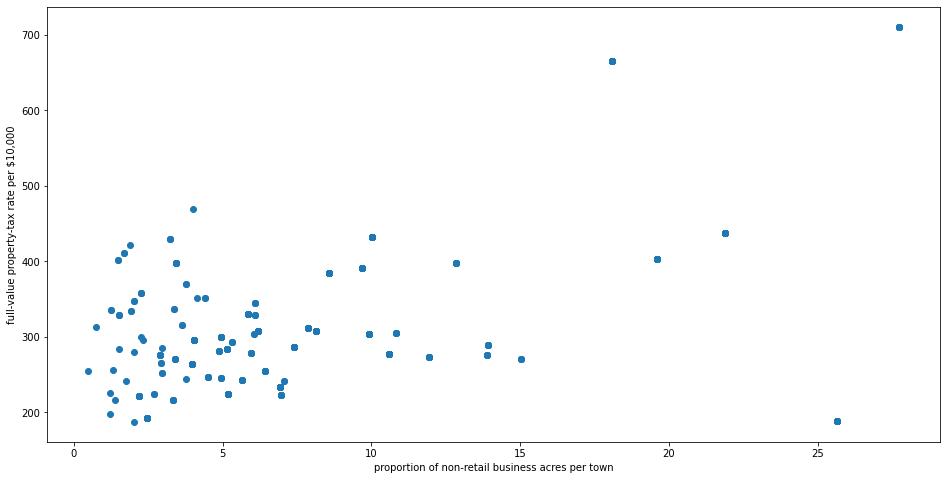

In [36]:
fig , ax=plt.subplots(figsize=(16,8))
ax.scatter(data['INDUS'],data['TAX'])
ax.set_xlabel("proportion of non-retail business acres per town")
ax.set_ylabel("full-value property-tax rate per $10,000")

Text(0, 0.5, 'Median Value in $10,000')

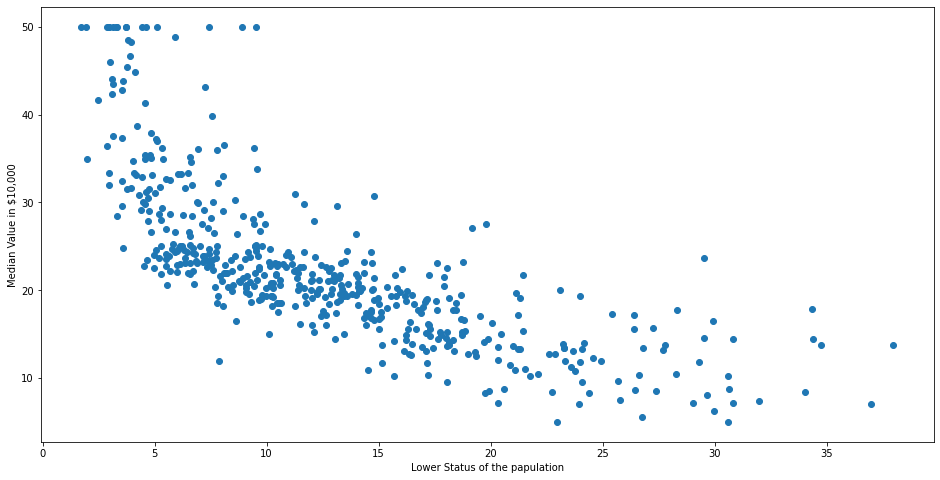

In [38]:
fig , ax=plt.subplots(figsize=(16,8))
ax.scatter(data['LSTAT'],data['MDEV'])
ax.set_xlabel("Lower Status of the papulation")
ax.set_ylabel("Median Value in $10,000")

### C) Using Z-Score

In [53]:
from scipy import stats
z=np.abs(stats.zscore(data))

In [54]:
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [55]:
outliers=np.where(z>3)

In [56]:
outliers


(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

### D) Using IQR

In [57]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [58]:
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MDEV         7.975000
dtype: float64

In [59]:
((data<(Q1-1.5*IQR))| (data>(Q3+1.5*IQR))).sum()

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MDEV       40
dtype: int64

In [60]:
data2=data.copy()

In [61]:
data.shape

(506, 14)

## 4.  Handling Outliers

### A) Removing Outliers

Using Z-Score

In [66]:
data2=data[(z<3).all(axis=1)]

All values in a record should be having z-values less than three. Not even a single column should have an outlier.

In [67]:
data2.shape

(415, 14)

Using IQR

In [42]:
data3=data.copy()

In [68]:
data3=data[((data>=(Q1-1.5*IQR))& (data<=(Q3+1.5*IQR))).all(axis=1)]

All values in a records should be in between IQR threshold

In [46]:
data3.shape

(268, 14)

## 5. Replacing Outliers 

#### Using IQR

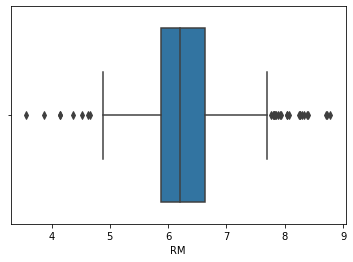

In [69]:
sns.boxplot(x=data['RM'])

In [70]:
Q1=data['RM'].quantile(0.25)
Q3=data['RM'].quantile(0.75)
IQR=Q3-Q1

In [71]:
IQR

0.7379999999999995

In [72]:
(data['RM']<(Q1-1.5*IQR)).sum()

8

In [73]:
(data['RM']>(Q3+1.5*IQR)).sum()

22

In [74]:
data['RM'] = np.where(data['RM'] <(Q1-1.5*IQR),Q1-1.5*IQR ,data['RM'])

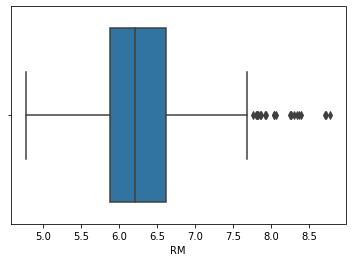

In [75]:
sns.boxplot(x=data['RM'])

In [76]:
data['RM'] = np.where(data['RM']>(Q3+1.5*IQR),Q3+1.5*IQR ,data['RM'])

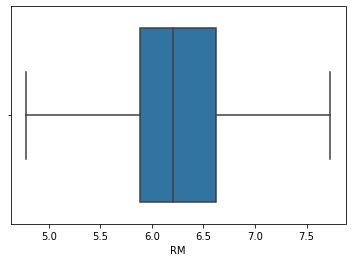

In [77]:
sns.boxplot(x=data['RM'])

#### Using Z Score

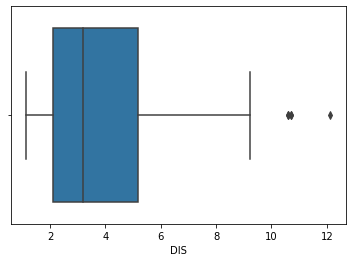

In [82]:
sns.boxplot(x=boston_df['DIS'])

In [83]:
z = np.abs(stats.zscore(data['DIS']))

In [102]:
data['DIS'] = np.where(z>3,data['DIS'].mean(),data['DIS'])

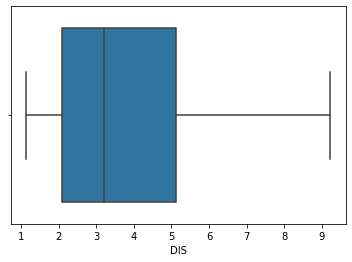

In [103]:
sns.boxplot(x=data['DIS'])